# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

# Data Dictionary:

# 1.1.	Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
 

In [416]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1.1.	Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

# EDA

# Data Importing

In [455]:
df_zirc=pd.read_csv("cubic_zirconia.csv")

# Shape

In [456]:
df_zirc.shape

(26967, 11)

In [457]:
df_zirc.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [458]:
#Dropping Unwanted Column
df_zirc=df_zirc.drop('Unnamed: 0',axis=1)

# Column Types and 5 Point summary

In [459]:
df_zirc.info()

#Below 3 objects are having object data types and they are categorical variables
#cut
#color
#clarity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [460]:
df_zirc.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


# Checking Duplicates

In [461]:
df_zirc.duplicated().sum()
#There are 34 duplicate values in the dataset.Dropping duplicate values

34

In [462]:
df_zirc[df_zirc.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [463]:
df_zirc.drop_duplicates(keep='first').shape
#Dropping 34 duplicates

(26933, 10)

In [464]:
df_zirc=df_zirc.drop_duplicates(keep='first')

In [465]:
df_zirc.shape

(26933, 10)

# isnull Check

In [466]:
df_zirc.isnull().sum()
#Depth is having 697 null values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

# Imputing Null Values

In [467]:
df_zirc.depth.value_counts()
#All values are continuous . Replacing Null with Mean value

62.0    1128
61.9    1090
62.1    1014
61.8    1012
62.2     976
        ... 
70.5       1
69.6       1
53.8       1
68.6       1
50.8       1
Name: depth, Length: 169, dtype: int64

In [468]:
mean = df_zirc['depth'].mean()
df_zirc['depth'] = df_zirc['depth'].fillna(mean)
df_zirc.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Checking Zeros

In [469]:
df_zirc[df_zirc['carat']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [470]:
df_zirc[df_zirc['depth']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [471]:
df_zirc[df_zirc['table']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [472]:
df_zirc[df_zirc['x']==0]
#2 rows have the 0 value for X column

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [473]:
df_zirc[df_zirc['y']==0]
#2 rows have the 0 value for y column

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [474]:
df_zirc[df_zirc['z']==0]
#8 rows have the 0 value for z column

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


# DROPING ZEROS present in 8 Rows,  As the value of Lenght ,Height  and Width should not be 0 

In [475]:
df_zirc.shape

(26933, 10)

In [476]:
df_zirc=df_zirc[df_zirc['z']!=0]
#Dropping 8 rows

In [477]:
df_zirc.shape

(26925, 10)

# Unique values from Object datatypes

In [478]:
for column in df_zirc.columns:
    if df_zirc[column].dtype == 'object':
        print(column.upper(),': ',df_zirc[column].nunique())
        print(df_zirc[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY :  8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




# Replacing Category based on order

In [479]:
df_zirc['cut']=np.where(df_zirc['cut'] =='Fair',5, df_zirc['cut'])
df_zirc['cut']=np.where(df_zirc['cut'] =='Good',4, df_zirc['cut'])
df_zirc['cut']=np.where(df_zirc['cut'] =='Very Good',3, df_zirc['cut'])
df_zirc['cut']=np.where(df_zirc['cut'] =='Premium',2, df_zirc['cut'])
df_zirc['cut']=np.where(df_zirc['cut'] =='Ideal',1, df_zirc['cut'])

In [480]:
df_zirc['color']=np.where(df_zirc['color'] =='D',1, df_zirc['color'])
df_zirc['color']=np.where(df_zirc['color'] =='E',2, df_zirc['color'])
df_zirc['color']=np.where(df_zirc['color'] =='F',3, df_zirc['color'])
df_zirc['color']=np.where(df_zirc['color'] =='G',4, df_zirc['color'])
df_zirc['color']=np.where(df_zirc['color'] =='H',5, df_zirc['color'])
df_zirc['color']=np.where(df_zirc['color'] =='I',6, df_zirc['color'])
df_zirc['color']=np.where(df_zirc['color'] =='J',7, df_zirc['color'])

In [481]:
df_zirc['clarity']=np.where(df_zirc['clarity'] =='FL',1, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='IF',2, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='VVS1',3, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='VVS2',4, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='VS1',5, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='VS2',6, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='SI1',7, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='SI2',8, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='I1',9, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='I2',10, df_zirc['clarity'])
df_zirc['clarity']=np.where(df_zirc['clarity'] =='I3',11, df_zirc['clarity'])

In [482]:
print(df_zirc['cut'].value_counts(),'\n')
print(df_zirc['color'].value_counts(),'\n')
print(df_zirc['clarity'].value_counts(),'\n')

1    10805
2     6880
3     6027
4     2434
5      779
Name: cut, dtype: int64 

4    5650
2    4916
3    4722
5    4091
1    3341
6    2765
7    1440
Name: color, dtype: int64 

7    6564
6    6092
8    4561
5    4086
4    2530
3    1839
2     891
9     362
Name: clarity, dtype: int64 



In [483]:
df_zirc.head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,1,2,7,62.1,58.0,4.27,4.29,2.66,499


In [484]:
df_zirc['cut']=df_zirc['cut'].astype(int)
df_zirc['color']=df_zirc['color'].astype(int)
df_zirc['clarity']=df_zirc['clarity'].astype(int)

# Univariate Analysis

In [485]:
df_zirc[df_zirc.columns[df_zirc.dtypes!='object']].head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,1,2,7,62.1,58.0,4.27,4.29,2.66,499


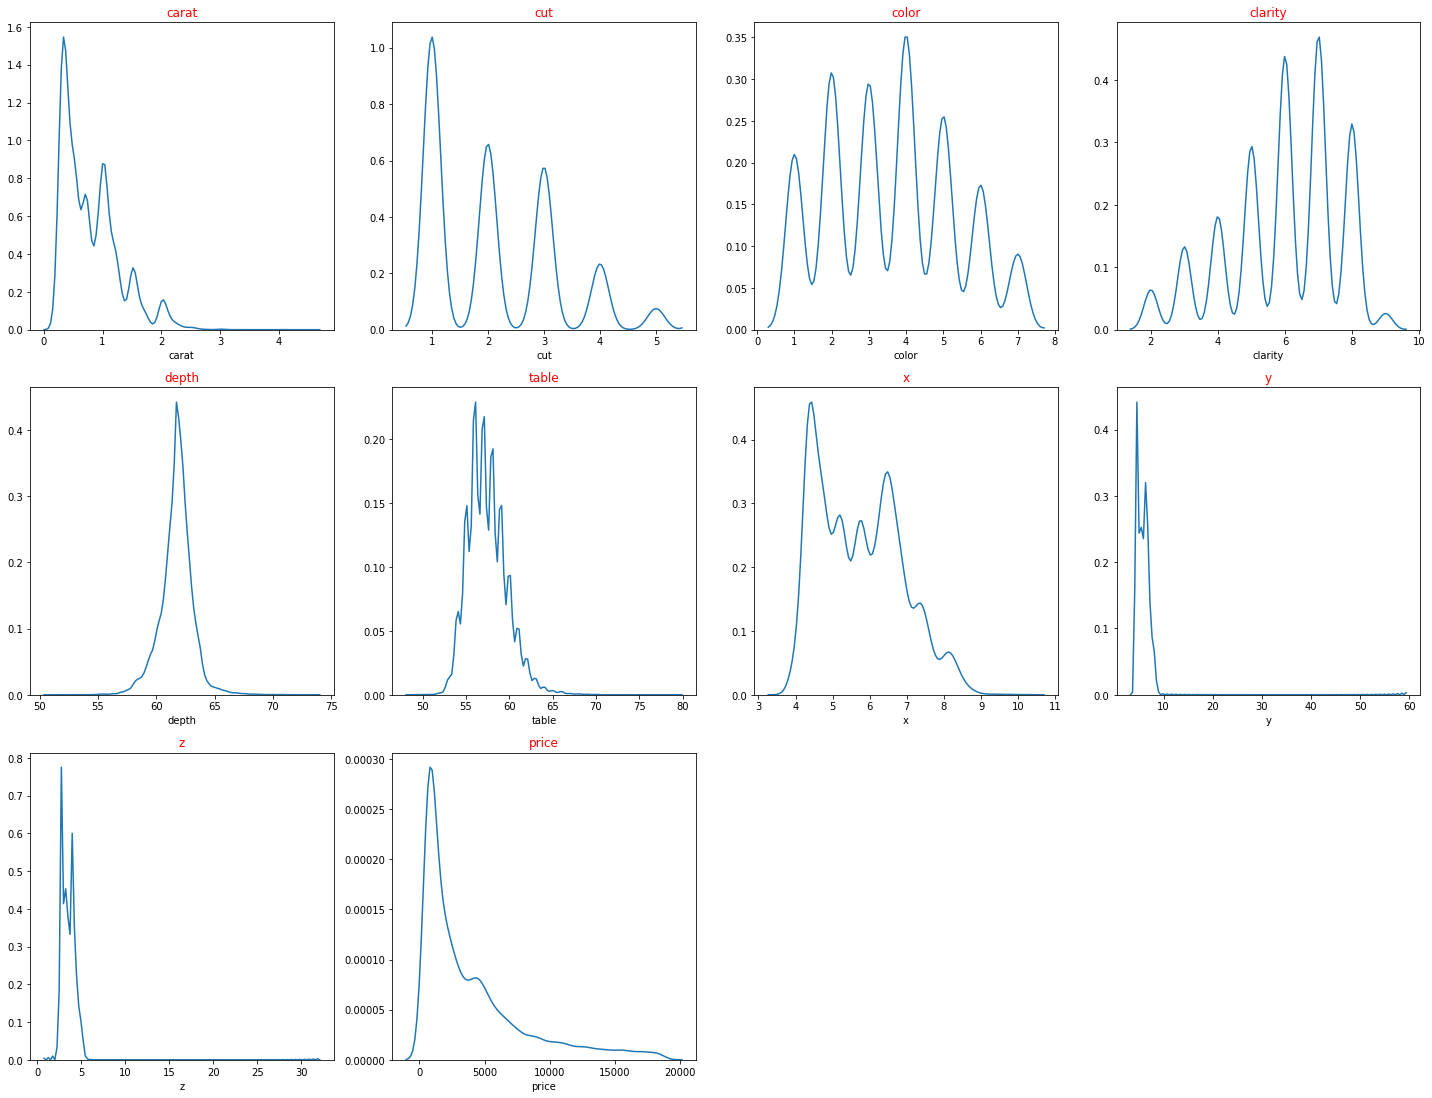

In [486]:
data_plot=df_zirc
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

# Outlier Check

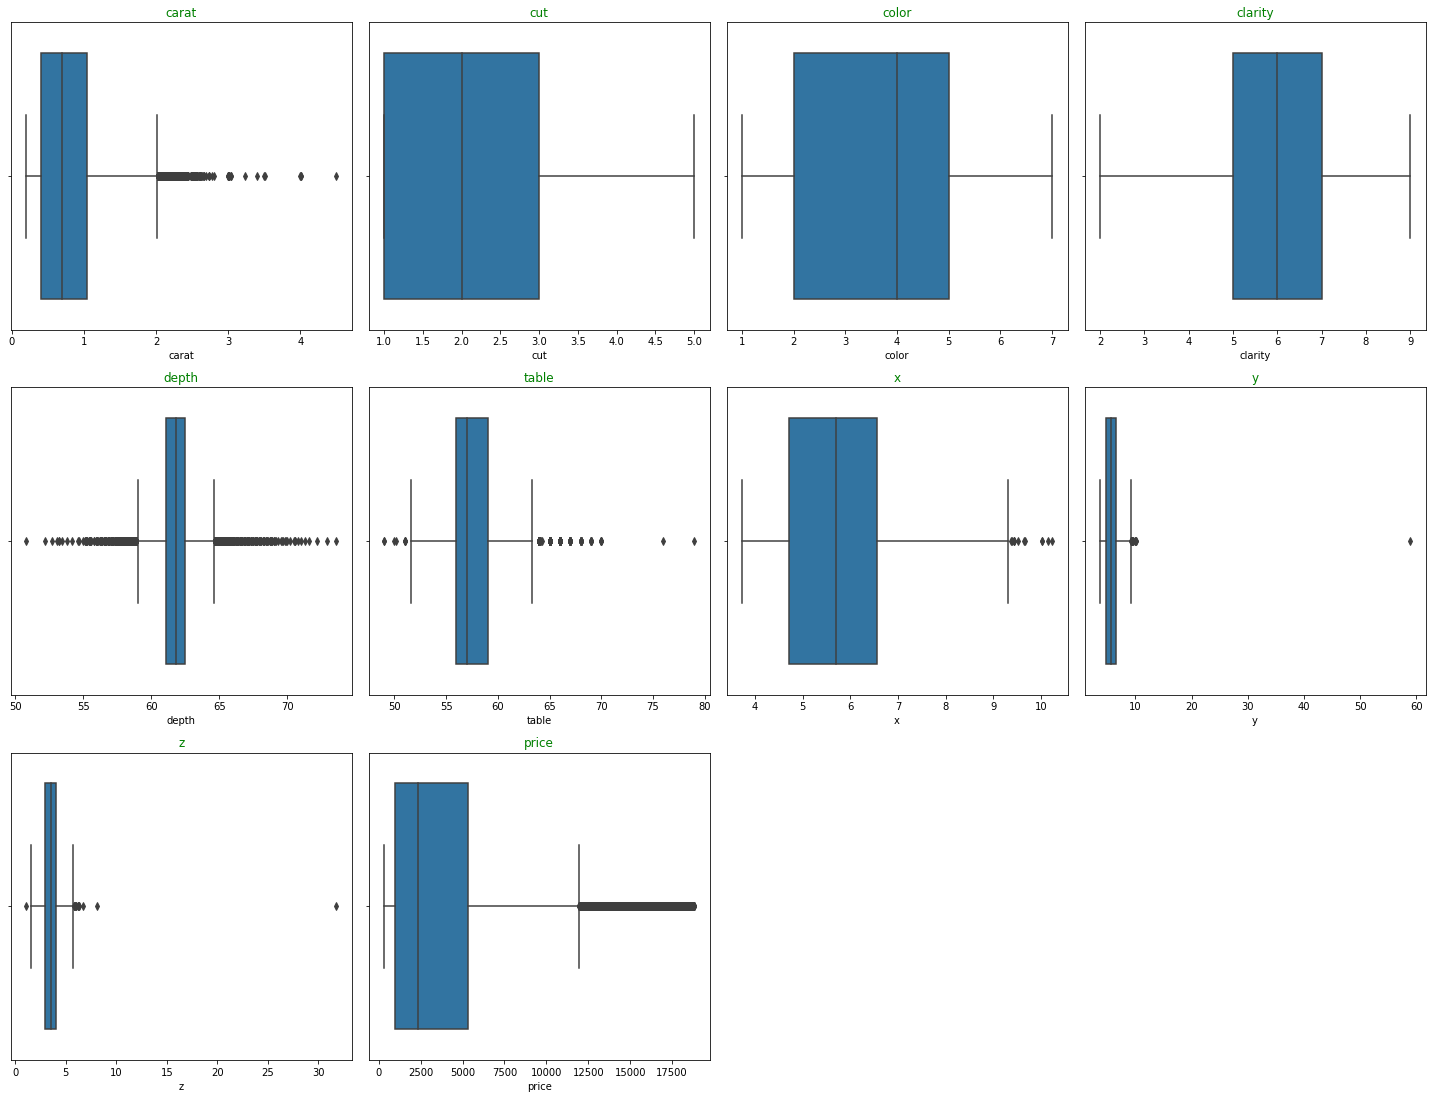

In [487]:
data_plot=df_zirc
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Green')
plt.tight_layout()
plt.show()
#Carat  , depth ,table , X,Y ,Z,price are having outliers

# Outlier Replacement

In [488]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [489]:
for column in df_zirc.columns:
        lr,ur=remove_outlier(df_zirc[column])
        df_zirc[column]=np.where(df_zirc[column]>ur,ur,df_zirc[column])
        df_zirc[column]=np.where(df_zirc[column]<lr,lr,df_zirc[column])

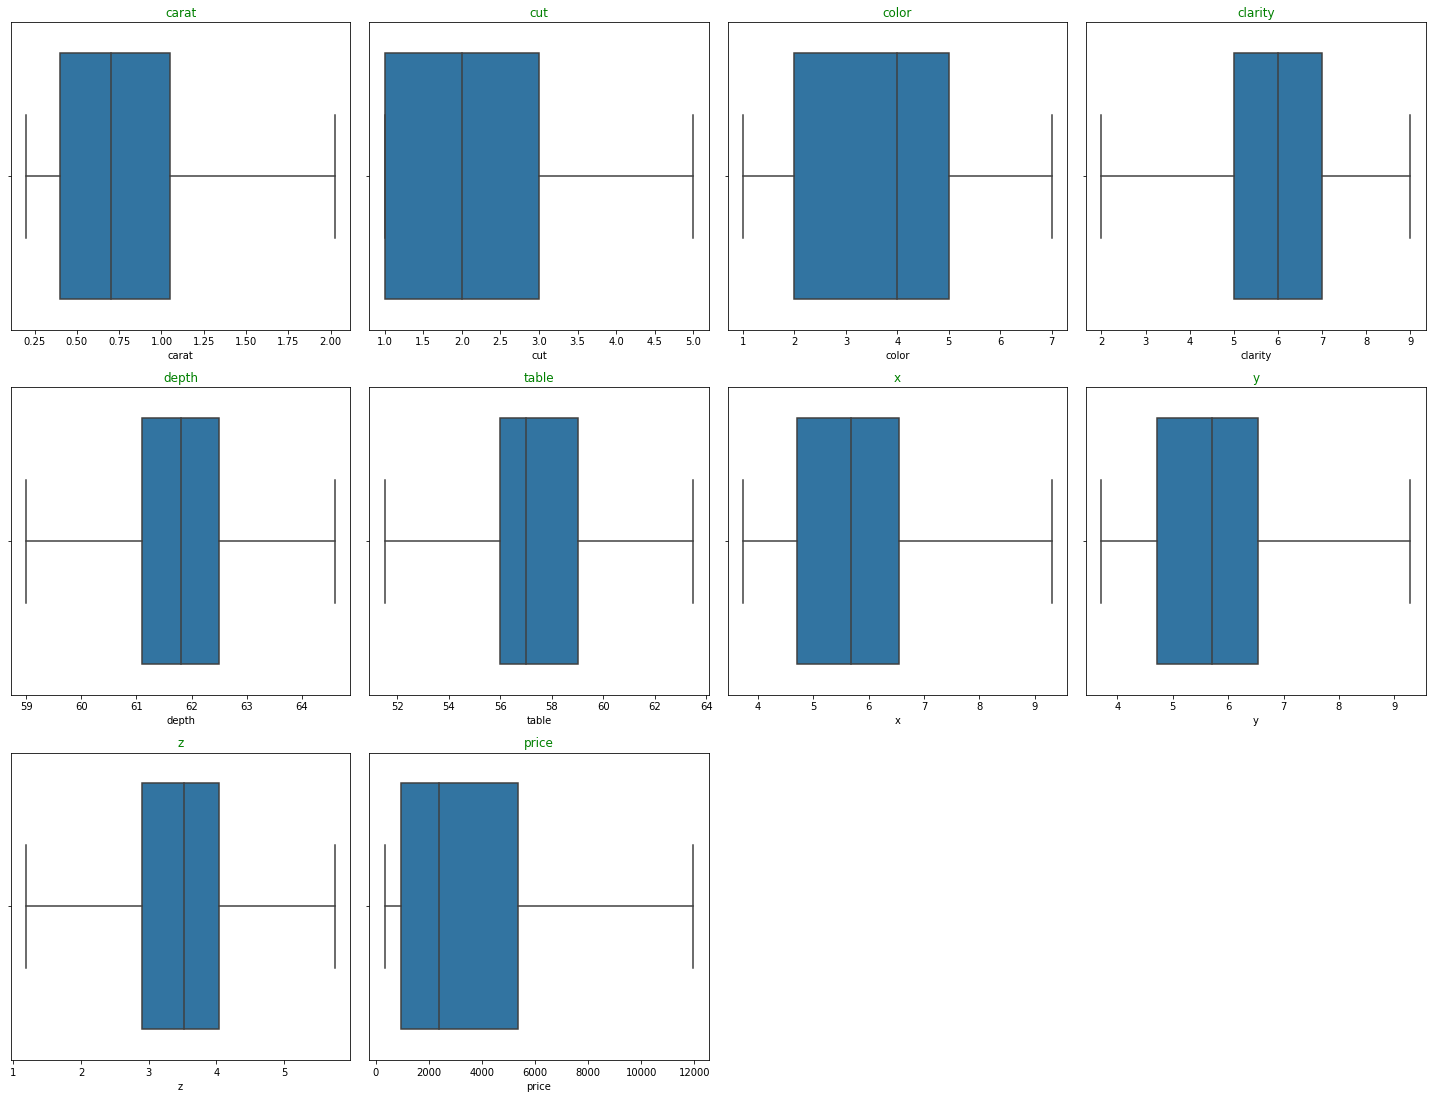

In [490]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df_zirc.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(df_zirc[df_zirc.columns[i]])
    ax.set_title(df_zirc.columns[i],color='Green')
plt.tight_layout()
plt.show()

In [491]:
df_zirc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
carat      26925 non-null float64
cut        26925 non-null float64
color      26925 non-null float64
clarity    26925 non-null float64
depth      26925 non-null float64
table      26925 non-null float64
x          26925 non-null float64
y          26925 non-null float64
z          26925 non-null float64
price      26925 non-null float64
dtypes: float64(10)
memory usage: 2.3 MB


In [492]:
df_zirc.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.793119,2.090139,3.604977,5.945961,61.749239,57.435023,5.729217,5.731159,3.537625,3734.453965
std,0.461998,1.113127,1.706043,1.646618,1.218216,2.156704,1.125500,1.117494,0.695681,3466.394724
min,0.200000,1.000000,1.000000,2.000000,59.000000,51.500000,3.730000,3.710000,1.190000,326.000000
25%,0.400000,1.000000,2.000000,5.000000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,2.000000,4.000000,6.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,3.000000,5.000000,7.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,2.025000,5.000000,7.000000,9.000000,64.600000,63.500000,9.310000,9.285000,5.750000,11965.000000


# Bivariate Analysis

In [493]:
corr=df_zirc.corr()
corr

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.141880,0.291562,0.355490,0.029700,0.187134,0.982880,0.981960,0.980882,0.936765
cut,0.141880,1.000000,0.026809,0.183331,0.225607,0.436346,0.132919,0.132814,0.157795,0.068368
color,0.291562,0.026809,1.000000,-0.021455,0.051507,0.023868,0.274085,0.273718,0.278308,0.177366
clarity,0.355490,0.183331,-0.021455,1.000000,0.066959,0.158662,0.376147,0.370914,0.379205,0.158226
depth,0.029700,0.225607,0.051507,0.066959,1.000000,-0.289172,-0.019704,-0.022746,0.094890,-0.000862
table,0.187134,0.436346,0.023868,0.158662,-0.289172,1.000000,0.199653,0.194015,0.160519,0.137915
x,0.982880,0.132919,0.274085,0.376147,-0.019704,0.199653,1.000000,0.998489,0.990898,0.913409
y,0.981960,0.132814,0.273718,0.370914,-0.022746,0.194015,0.998489,1.000000,0.990533,0.914838
z,0.980882,0.157795,0.278308,0.379205,0.094890,0.160519,0.990898,0.990533,1.000000,0.908599
price,0.936765,0.068368,0.177366,0.158226,-0.000862,0.137915,0.913409,0.914838,0.908599,1.000000


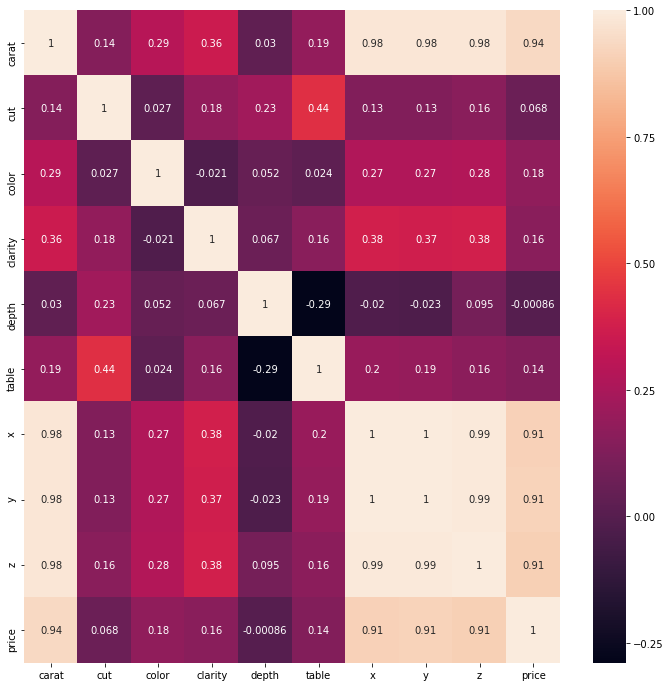

In [494]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

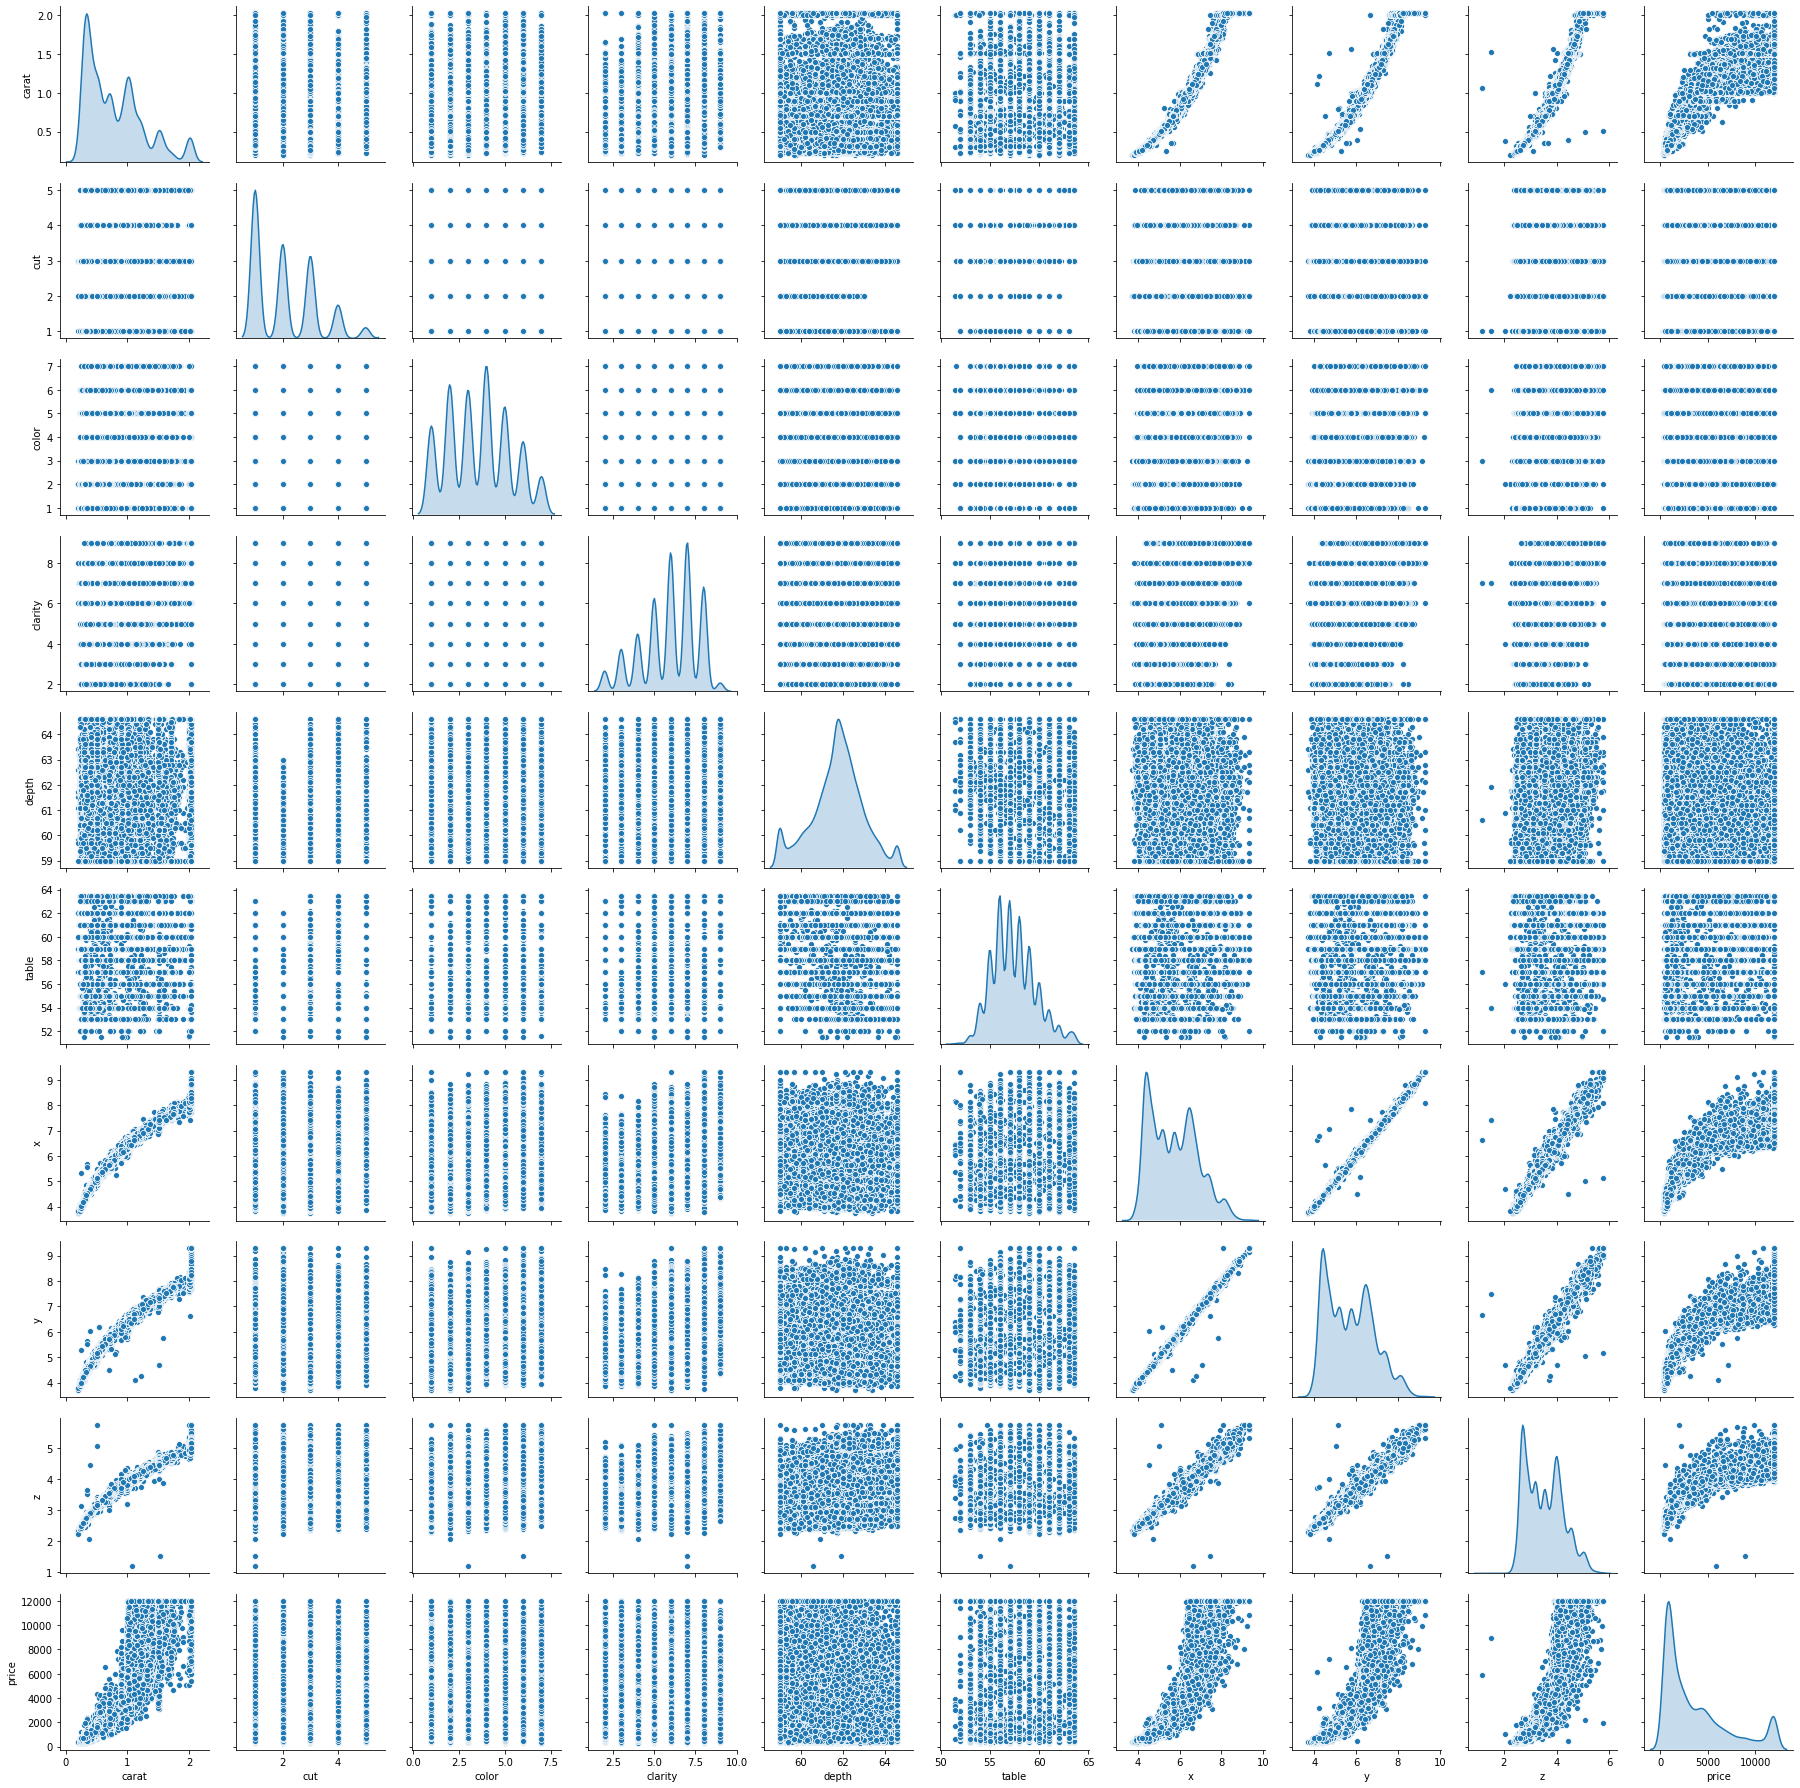

In [438]:
sns.pairplot(df_zirc, diag_kind='kde')  
plt.show()

<b>CONCLUSION

>From the graph we can depict that X,Y,Z,Carot ,Price variables shows positive correlation

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

# NULL AND ZERO Conclusion

<b>Null Check

>697 nulls present in Depth variable

>Mean value imputation has been done for these null values

<b>Zero Check

>There are total 8 rows which are having the values as 0 in column Z

>Dropping these 8 rows as these values as hieght ,width and bredth and they should not be zero

# SCALING

# Before Scaling

In [495]:
df_zirc.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.793119,2.090139,3.604977,5.945961,61.749239,57.435023,5.729217,5.731159,3.537625,3734.453965
std,0.461998,1.113127,1.706043,1.646618,1.218216,2.156704,1.125500,1.117494,0.695681,3466.394724
min,0.200000,1.000000,1.000000,2.000000,59.000000,51.500000,3.730000,3.710000,1.190000,326.000000
25%,0.400000,1.000000,2.000000,5.000000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,2.000000,4.000000,6.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,3.000000,5.000000,7.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,2.025000,5.000000,7.000000,9.000000,64.600000,63.500000,9.310000,9.285000,5.750000,11965.000000


# After Scaling

In [496]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
scaled_df=SS.fit_transform(df_zirc)

scaled_df = pd.DataFrame(scaled_df, index=df_zirc.index, columns=df_zirc.columns)
scaled_df.head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067382,-0.979367,-0.940777,0.640136,0.287935,0.261968,-1.29653,-1.289659,-1.261558,-0.933395


In [497]:
scaled_df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,2.692500e+04,2.692500e+04,2.692500e+04,2.692500e+04,2.692500e+04,2.692500e+04,2.692500e+04,2.692500e+04,2.692500e+04,2.692500e+04
mean,7.477770e-17,7.236603e-17,1.199824e-16,-1.823363e-17,1.676822e-15,-6.847427e-16,-4.903372e-16,6.558006e-16,-1.453248e-16,-3.951446e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.283838e+00,-9.793667e-01,-1.526940e+00,-2.396449e+00,-2.256817e+00,-2.751947e+00,-1.776326e+00,-1.808688e+00,-3.374636e+00,-9.833033e-01
25%,-8.509271e-01,-9.793667e-01,-9.407773e-01,-5.744980e-01,-5.329526e-01,-6.653904e-01,-9.055850e-01,-9.138112e-01,-9.165660e-01,-8.047283e-01
50%,-2.015614e-01,-8.097993e-02,2.315478e-01,3.281879e-02,4.166898e-02,-2.017112e-01,-3.484447e-02,-2.788358e-02,-2.533574e-02,-3.927652e-01
75%,5.560319e-01,8.174068e-01,8.177104e-01,6.401356e-01,6.162905e-01,7.256472e-01,7.292748e-01,7.238126e-01,7.221477e-01,4.669336e-01
max,2.666470e+00,2.614180e+00,1.990036e+00,1.854769e+00,2.340155e+00,2.812204e+00,3.181565e+00,3.180248e+00,3.180218e+00,2.374426e+00


<b>Conclusion :</b>

1.As there are different units used for different columns, Data Scaling is required

2.5 point summary of data is different for all columns

3.Difference in mean and standard deviation for columns in the dataset before scaling

4.After Scaling , we can see STD as 1 and MEAN as 0 in Five point summary

5.Also Linear regression will give good results after scaling

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

# Data Encoding

<b> CONCLUSION

>3 Variables - Cut , Color and Clarity have the categorical information.

>As per data dictionary these categories are ordinal categories

>These categorical information replaced by keeping 1 as the highest rank and gradually increases

>Ex : D to J is replaced as 1 to 7 in the dataframe

# Train and Test Before Scaling

In [498]:
# Copy all the predictor variables into X dataframe
X = df_zirc.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df_zirc[['price']]

In [499]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Linear Regression Model Before Scaling

In [500]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [501]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8887.319701678043
The coefficient for cut is -113.30667821307946
The coefficient for color is -273.2210643335951
The coefficient for clarity is -436.89343926835886
The coefficient for depth is 35.28659257993856
The coefficient for table is -15.082037363427617
The coefficient for x is -1349.1287855146034
The coefficient for y is 1561.2038354355273
The coefficient for z is -968.8993261708242


In [502]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1401.1369262892817


In [503]:
# R square on training data
regression_model.score(X_train, y_train)

0.9312284399982212

In [504]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9316264667022087

In [505]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

906.9014758030759

In [506]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.2934212177842

# Train and Test of Scaled Data

In [507]:
# Copy all the predictor variables into X dataframe
X = scaled_df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = scaled_df[['price']]

In [508]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Linear Regression Model Scaled Data

In [509]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [510]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1844937937716802
The coefficient for cut is -0.03638498772026022
The coefficient for color is -0.13447023012968934
The coefficient for clarity is -0.2075344782427007
The coefficient for depth is 0.012400977169942914
The coefficient for table is -0.009383664108512341
The coefficient for x is -0.43804704198330857
The coefficient for y is 0.5032996450231598
The coefficient for z is -0.1944511328689174


In [511]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.0002913307200823436


In [512]:
# R square on training data
regression_model.score(X_train, y_train)

0.9312284399982212

In [513]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9316264667022087

In [514]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.26163157685296945

In [515]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2628986071037306

# Linear Regression using statsmodels

In [516]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,0.664259,1.715794,-0.940777,1.247452,1.273001,-0.665390,0.711505,0.759608,0.880269,0.095359
12108,0.469450,0.817407,-1.526940,1.247452,1.847622,-0.665390,0.507147,0.580632,0.750897,0.412986
20181,-0.266498,1.715794,1.403873,0.032819,-0.861308,1.838477,-0.114810,-0.081576,-0.183457,-0.584611
4712,-0.071688,1.715794,0.231548,0.640136,-2.256817,2.580364,0.285019,0.213733,-0.097209,-0.371417
2548,0.469450,-0.080980,0.231548,-0.574498,0.862557,0.725647,0.569343,0.544837,0.650274,0.831873


In [517]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

<b>------------------------------------ITERATION 1 (All variables) ----------------------------------

In [518]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [519]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -0.000291
carat        1.184494
cut         -0.036385
color       -0.134470
clarity     -0.207534
depth        0.012401
table       -0.009384
x           -0.438047
y            0.503300
z           -0.194451
dtype: float64

In [520]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:49:54   Log-Likelihood:                -1472.3
No. Observations:               18847   AIC:                             2965.
Df Residuals:                   18837   BIC:                             3043.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003      0.002     -0.153      0.8

In [521]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [522]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.26163157685296917

In [523]:
np.sqrt(lm1.mse_resid) #another way

0.2617010138288605

In [524]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

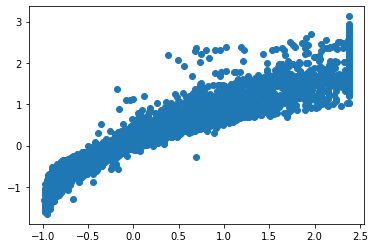

In [525]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [526]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.18) * carat + (-0.04) * cut + (-0.13) * color + (-0.21) * clarity + (0.01) * depth + (-0.01) * table + (-0.44) * x + (0.5) * y + (-0.19) * z + 

In [527]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [528]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [529]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 32.89084605534308
cut ---> 1.5095850487522104
color ---> 1.1198464205852092
clarity ---> 1.2414381696060102
depth ---> 4.4541413993211485
table ---> 1.6183352538669076
x ---> 417.3785180640983
y ---> 398.5771893470905
z ---> 234.8611442245287


<b>CONCLUSION

<b>1. Ordinal Categorical variables - Cut ,Color,Clarity are replaced with numbers starting 1 as highest importance</b>

<b>2.Dataframe is scaled before applying Linear Regression</b>
    
<b>3.R Square and RMSE:Train and Testing data have almost similar R-Square and RMSE values</b>
    
R square on training data : 0.9312284399982212

R square on testing data  : 0.9316264667022087

RMSE on Training data: 0.26163157685296945

RMSE on Testing data : 0.2628986071037306 

<B> -------------------------------------------ITERATION 2 ---------------------------------------------------------------

In [530]:
#Excluding x,y,z variables as these variables are having high correlation with Carat and price columns

#expr= 'price ~ carat + cut + color + clarity + depth + table + x + y'  -- 0.931
#expr= 'price ~ carat + cut + color + clarity + depth + table + x'  -- 0.931
#expr= 'price ~ carat + cut + color + clarity + depth + table' ---- 0.930
#expr= 'price ~ carat + cut + color + clarity + depth' ---- 0.930
#expr= 'price ~ carat + cut + color + clarity + table' ---- 0.930
#expr= 'price ~ cut + color + clarity + depth + table' --0.069
expr= 'price ~ carat + cut + color + clarity + table' # ---- 0.930

In [531]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -0.000186
carat        1.060388
cut         -0.036583
color       -0.134105
clarity     -0.214310
table       -0.009474
dtype: float64

In [532]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 5.017e+04
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:50:47   Log-Likelihood:                -1620.7
No. Observations:               18847   AIC:                             3253.
Df Residuals:                   18841   BIC:                             3300.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.002     -0.097      0.9

In [533]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [534]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.2636993874198235

In [535]:
np.sqrt(lm1.mse_resid) #another way

0.2637413721971768

In [536]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

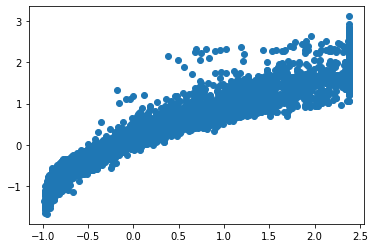

In [537]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [538]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.06) * carat + (-0.04) * cut + (-0.13) * color + (-0.21) * clarity + (-0.01) * table + 

In [539]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [540]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [541]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 32.89084605534308
cut ---> 1.5095850487522104
color ---> 1.1198464205852092
clarity ---> 1.2414381696060102
depth ---> 4.4541413993211485
table ---> 1.6183352538669076
x ---> 417.3785180640983
y ---> 398.5771893470905
z ---> 234.8611442245287


# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

<b>>Model is 93 percentage efficient in predicting the values</b>

<b>>R Square and RMSE:Train and Testing data have almost similar R-Square and RMSE values considering all attributes</b>
    
R square on training data : 0.9312284399982212

R square on testing data  : 0.9316264667022087

RMSE on Training data: 0.26163157685296945

RMSE on Testing data : 0.2628986071037306 

<b>>Linear Regression representation for all variables</b> 

price= b0 + b1 * carat + b2 * cut + b3 * color + b4 * clarity + b5 * depth + b6 * table + b7 * x + b8 * y + b9 * z

price= (-0.0) * Intercept + (1.18) * carat + (-0.04) * cut + (-0.13) * color + (-0.21) * clarity + (0.01) * depth + (-0.01) * table + (-0.44) * x + (0.5) * y + (-0.19) * z

<b>>Carat,depth and y are having positive impact on price and rest all independent variables have negative impact on price</b>

carat ---> 32.89084605534308, 
cut ---> 1.5095850487522104, 
color ---> 1.1198464205852092, 
clarity ---> 1.2414381696060102, 
table ---> 1.6183352538669076,

    
<b>>These 5 independent variables - carat + cut + color + clarity + table considered based on variance inflation factor for regression model
    Linear Regression equation:
    (-0.0) * Intercept + (1.06) * carat + (-0.04) * cut + (-0.13) * color + (-0.21) * clarity + (-0.01) * table
    
  
<b>>From scatter plot we can identify , plot is showing good prediction representation for this model

# Problem 2: Logistic Regression and LDA --> You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.
Dataset for Problem 2: Holiday_Package.csv


# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [542]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [543]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression


# Data Importing

In [544]:
df_hol=pd.read_csv("Holiday_Package.csv")

In [545]:
df_hol.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [546]:
#Drop unwanted column
df_hol=df_hol.drop('Unnamed: 0',axis=1)

In [547]:
df_hol.info()
#Holiday Package and Foriegn columns are object datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


# Shape

In [548]:
df_hol.shape

(872, 7)

# Null Check

In [549]:
df_hol.isnull().sum()
#There are no null values in the dataset 

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

# Duplicate check

In [550]:
df_hol.duplicated().sum()
#There are no duplicates in the dataframe

0

In [551]:
df_hol.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [552]:
df_hol.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

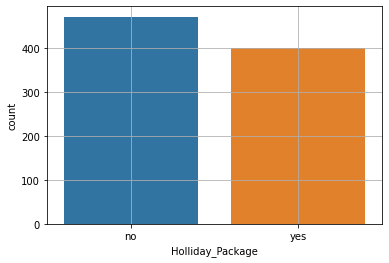

In [553]:
sns.countplot(df_hol.Holliday_Package)
plt.grid()
plt.show()

In [554]:
for feature in df_hol.columns: 
    if df_hol[feature].dtype == 'object': 
        print(feature)
        print(df_hol[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




# Univariate Analysis

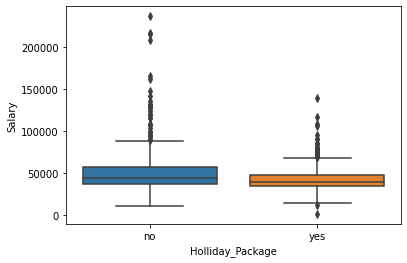

In [555]:
sns.boxplot(df_hol['Holliday_Package'],df_hol['Salary'])

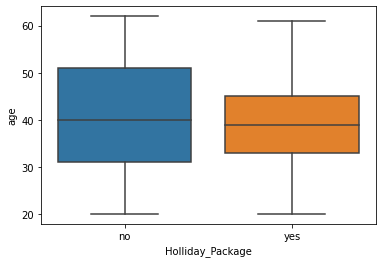

In [556]:
sns.boxplot(df_hol['Holliday_Package'],df_hol['age'])

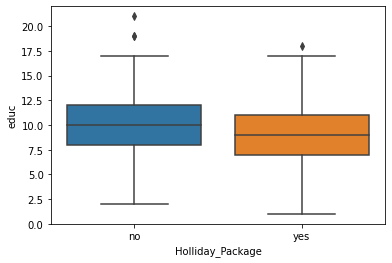

In [557]:
sns.boxplot(df_hol['Holliday_Package'],df_hol['educ'])

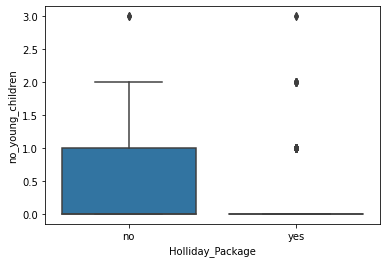

In [558]:
sns.boxplot(df_hol['Holliday_Package'],df_hol['no_young_children'])

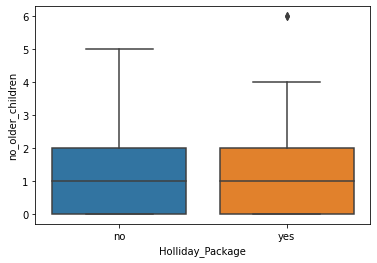

In [559]:
sns.boxplot(df_hol['Holliday_Package'],df_hol['no_older_children'])

In [560]:
C=df_hol.columns[df_hol.dtypes != 'object']

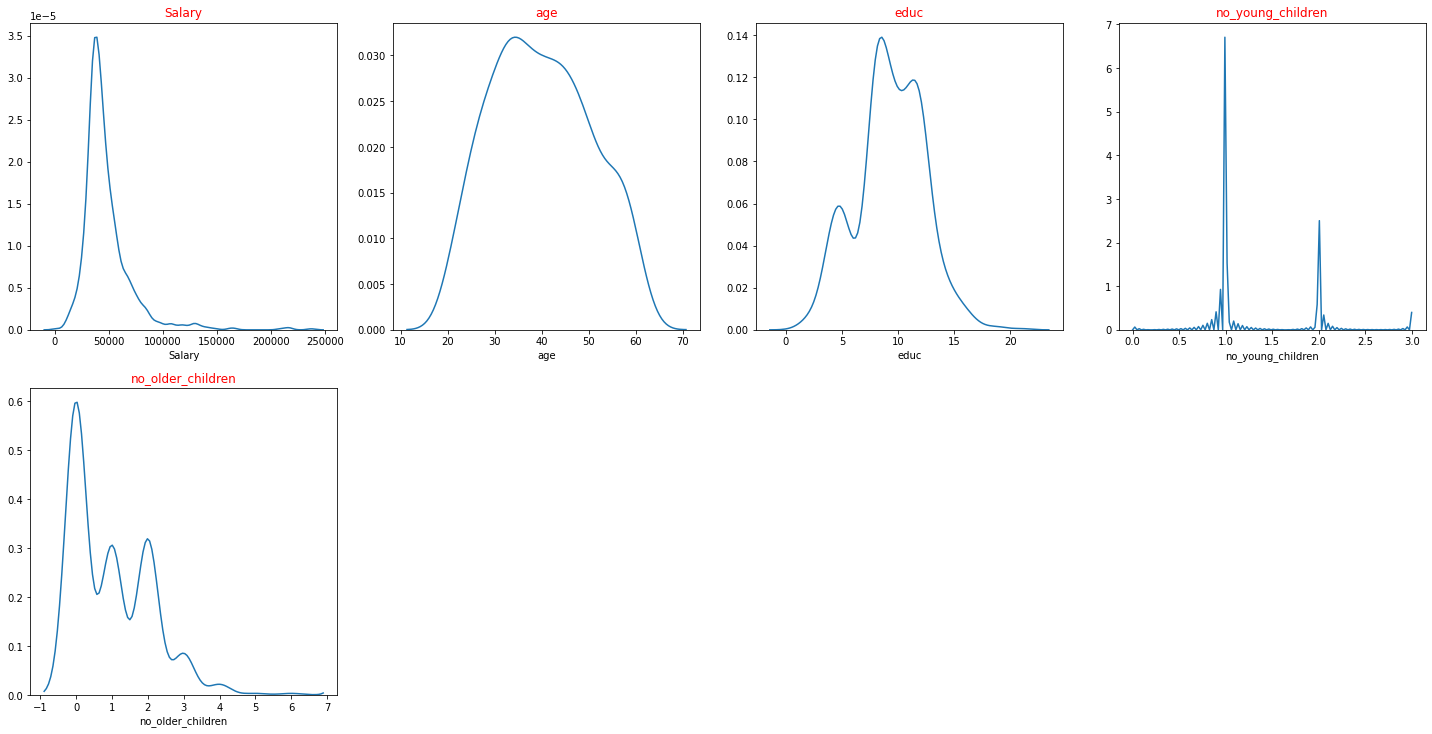

In [561]:
data_plot=df_hol[C]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns != 'object')):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

# Outlier Check

In [562]:
C

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'], dtype='object')

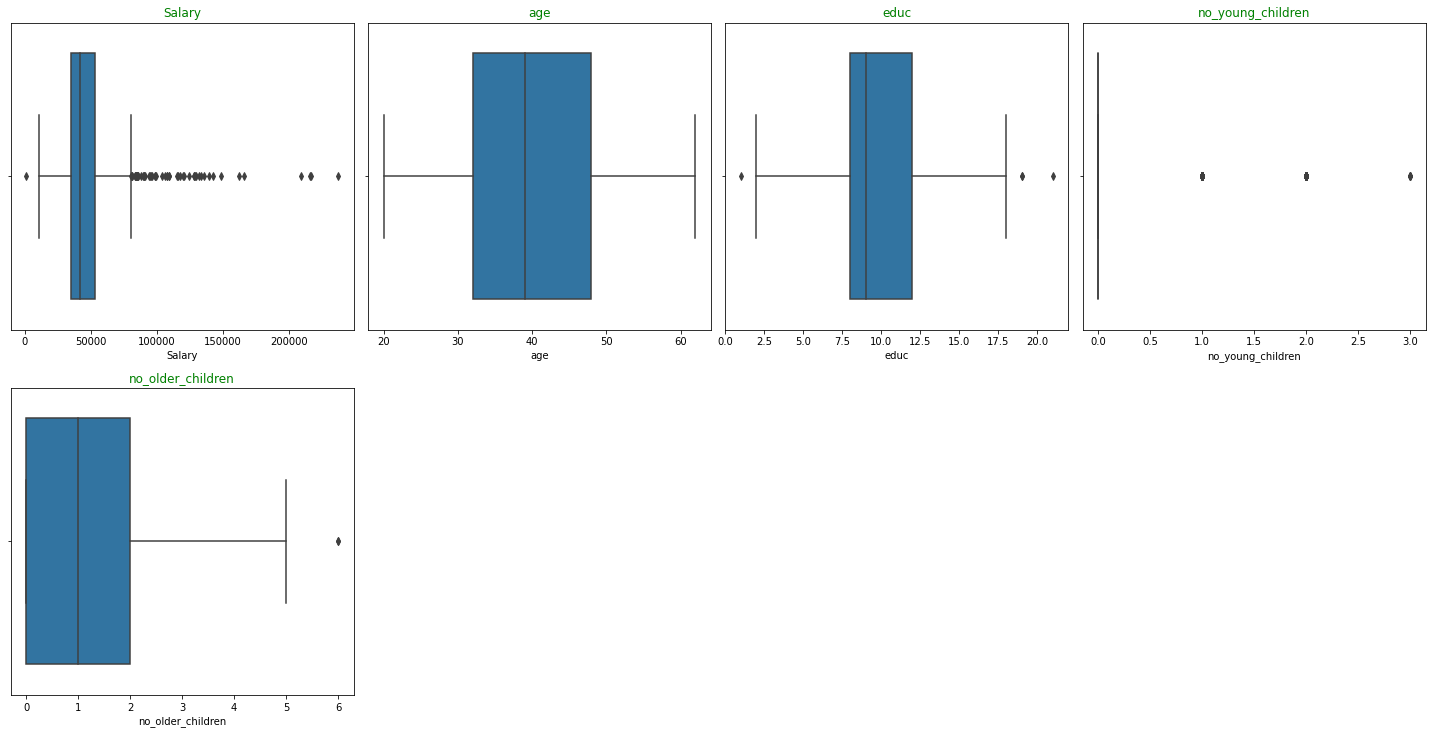

In [563]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Green')
plt.tight_layout()
plt.show()
#Salary and Education are outliers

# Treating Outliers:

In [564]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [565]:
for column in ['Salary','educ']:
    if df_hol[column].dtype != 'object': 
        lr,ur=remove_outlier(df_hol[column])
        df_hol[column]=np.where(df_hol[column]>ur,ur,df_hol[column])
        df_hol[column]=np.where(df_hol[column]<lr,lr,df_hol[column])

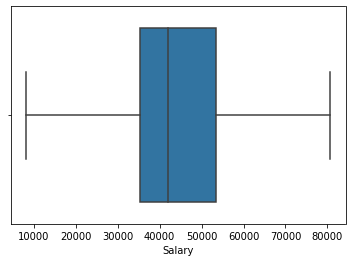

In [566]:
sns.boxplot(df_hol['Salary'])

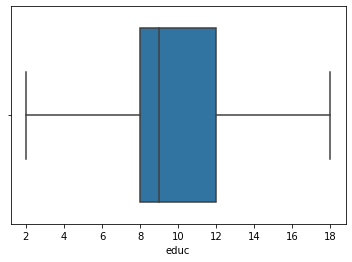

In [567]:
sns.boxplot(df_hol['educ'])

# Correlation

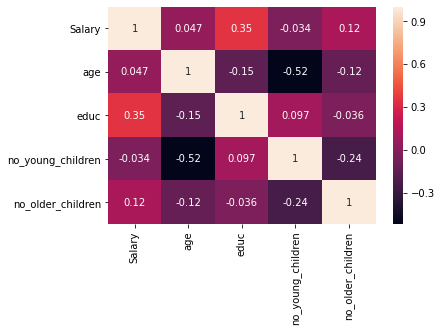

In [568]:
sns.heatmap(df_hol.corr(), annot=True)

<b>Age-No of Younger childern is having negative correlation

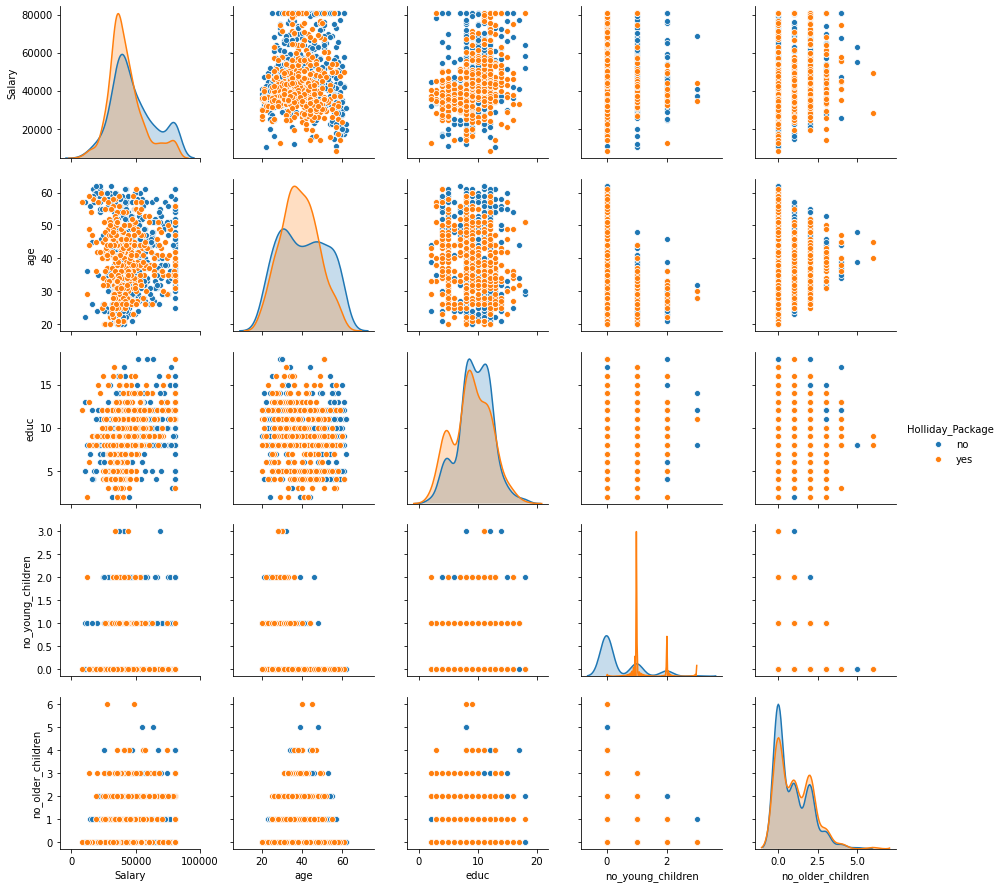

In [253]:
# Pairplot using sns
sns.pairplot(df_hol , hue='Holliday_Package' , diag_kind = 'kde')

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

# Encoding Categorical Information 

In [569]:
for feature in df_hol.columns: 
    if df_hol[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_hol[feature].unique()))
        print(pd.Categorical(df_hol[feature].unique()).codes)
        df_hol[feature] = pd.Categorical(df_hol[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [570]:
df_hol.head(2)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8.0,1,1,0
1,1,37207.0,45,8.0,0,1,0


# Train Test Split

In [571]:
# Copy all the predictor variables into X dataframe
X = df_hol.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df_hol['Holliday_Package']

In [572]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [573]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (610, 6)
X_test: (262, 6)
y_train: (610,)
y_test: (262,)


In [574]:
df_hol['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

# LOGISTIC REGRESSION

In [575]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   22.5s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

# Predicting on Training and Test dataset

In [576]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

# Getting the Predicted Classes and Probs

In [577]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.773157,0.226843
1,0.273319,0.726681
2,0.903240,0.096760
3,0.958323,0.041677
4,0.512212,0.487788


# Model Evaluation

In [578]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6754098360655738

# Model Evaluation of test data

In [579]:
# Accuracy - Train Data
model.score(X_test, y_test)

0.6374045801526718

# AUC and ROC for the test data

AUC: 0.742


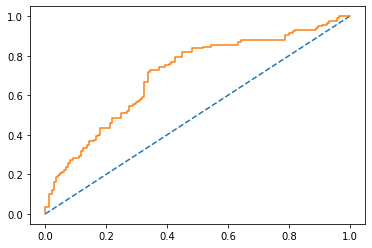

In [580]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# AUC and ROC for the training data

AUC: 0.742


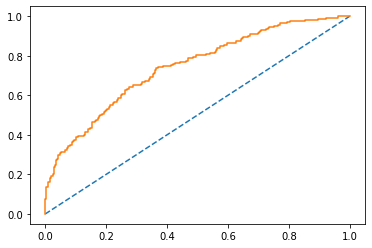

In [581]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

# Confusion Matrix for the training data

In [582]:
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [124, 160]], dtype=int64)

In [583]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



# Confusion Matrix for test data

In [585]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.6374045801526718

In [584]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[102,  43],
       [ 52,  65]], dtype=int64)

In [586]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



# LDA

In [587]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [588]:
# Copy all the predictor variables into X dataframe
X = df_hol.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df_hol['Holliday_Package']

In [589]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [590]:
clf = LinearDiscriminantAnalysis()

In [591]:
model1=clf.fit(X_train,y_train)
model1

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [592]:
# Predict it for Test
pred_class = model1.predict(X_test)

In [593]:
confusion_matrix(y_test, pred_class)

array([[102,  43],
       [ 52,  65]], dtype=int64)

In [594]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



# Predict for Train

In [595]:
pred_class_train = model1.predict(X_train)

In [596]:
confusion_matrix(y_train, pred_class_train)

array([[254,  72],
       [126, 158]], dtype=int64)

In [597]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



# AUC and ROC for the training data

AUC: 0.742


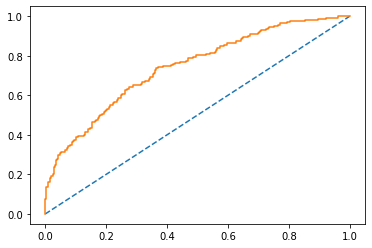

In [598]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

# AUC and ROC for the test data

AUC: 0.742


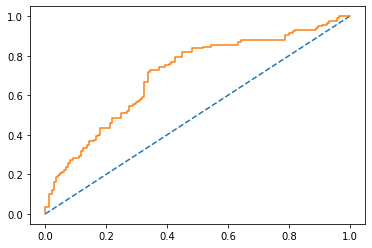

In [599]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

<B> Model Reports on LOGIT and LDA
    
LOGIT

Train:
AUC: 0.742
Accuracy :0.68
F1 Score: 0.62
Recall : 0.56
precision : 0.68

Test : 
AUC: 0.742
Accuracy : 0.66
F1 Score: 0.58
Recall : 0.56
precision : 0.60

LDA

Train:
AUC:0.742 
Accuracy :0.68
F1 Score: 0.61
Recall : 0.56
precision : 0.69

Test : 
AUC:0.742
Accuracy :0.64
F1 Score: 0.58
Recall : 0.56
precision : 0.60


<B>>LDA and Logit have the same AUC,Accuracy scores for Train data .LOGIT has more Accuracy for testing data than compared to LDA</B>

<B>>LDA and Logit both having the same sensitivity. Same True positive percentage prediction.</B>
    
<B>>Recall is 56% for both LDA and logit which is very low while identifing the TP cases.
    
<B>While the model results between training and test sets are similar, indicating no under or overfitting issues, overall prediction of the model is weaker in terms of predicting Holiday packages. Considering the class imabalance ratio is moderate and not high, with more training data, the model is expected to perform even better.   